In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', None)
from IPython.core.display import HTML
import warnings
warnings.filterwarnings('ignore')

In [2]:
with open("CSS_adage_td", 'r') as f:
    CSS_style = f.read()

display(HTML(f'<style>{CSS_style}</style'))

In [3]:
def ci_95(values):
    """
    Calculate the interval that contains 95% of the population for a given dataset.
    
    Parameters:
        values (array-like): The dataset.
    
    Returns:
        tuple: The lower and upper bounds of the interval that contains 95% of the population.
    """
    
    lower = np.percentile(values.dropna(), 2.5)
    upper = np.percentile(values.dropna(), 97.5)
    
    return (lower, upper)

In [4]:
patients_raw = pd.read_csv('bdd_patients.csv', sep = ';')
pkpd1_raw = pd.read_csv('bdd_pkpd1.csv', sep = ';')
pkpd2_raw = pd.read_csv('bdd_pkpd2.csv', sep = ';')

from adage_viz_dicts import col_rename_patients, col_to_delete_patients, col_rename_pkpd_1, col_to_delete_pkpd_1, col_rename_pkpd_2, col_to_delete_pkpd_2

patients = patients_raw.drop(col_to_delete_patients, inplace = False, axis = 1)
patients.rename(col_rename_patients, axis = 1, inplace = True)

pkpd1 = pkpd1_raw.drop(col_to_delete_pkpd_1, axis = 1)
pkpd1.rename(col_rename_pkpd_1, axis = 1, inplace = True)

pkpd2 = pkpd2_raw.drop(col_to_delete_pkpd_2, axis = 1)
pkpd2.rename(col_rename_pkpd_2, axis = 1, inplace = True)

#Creating separates dfs for stats purposes

drivingt0 = pkpd2[(pkpd2['doac'] == 'DR') & (pkpd2['conc'] == 0)]


patients["incl_date"] = pd.to_datetime(patients.incl_date).dt.strftime('%Y-%m-%d')
#patients['incl_date'] = pd.to_datetime(patients['incl_date'])
patients['kidneyf_class'] = patients.clcr_cockcroft.apply(lambda x: 0 if x >= 90 else(1 if x >= 60 else(2 if x >= 30 else (3 if x >=0 else(None)))))

#These columns got deleted for several reasons: some contained sensitive data (patient identification), some were duplicates, some did not bring usefull information for the present project, and some were simply ornemental (to make the original excel file more reader-friendly).
#The original databases were in french, column names will be renamed in a more convenient manner.

#Creating a df with all pkpd data:

pkpd = pd.concat([pkpd1, pkpd2], sort= False)

#fixing a datatype issue with ast (a value was entered as " ")
pkpd['ast'] = pkpd['ast'].replace('', np.nan)
pkpd['ast'] = pd.to_numeric(pkpd['ast'], errors='coerce')
pkpd['ast'] = pkpd['ast'].astype('float')

In [5]:
color_a = 'cornflowerblue'
color_r = 'firebrick'
color_d = 'silver'
labelfontsize = 12

lt = 'Lag_ATG (min)'
ttp = 'Tmax_ATG (min)'
ph = 'Cmax_ATG (AU/L)'
etp = 'ETP_ATG (AU*min/L)'
v = 'V (µm/min)'
ltfib = 'Tlag (min)'
cs = 'cs (µm)'
d = 'D (a.u.)'
vi = 'Vi (µm/min)'
tsp = 'tsp (min)'

conc_a = ('Apixaban concentration in ng/mL')
conc_r = ('Rivaroxban concentration in ng/mL')
conc_d = ('Dabigatran concentration in ng/mL')

param_td_vitro = ['v', 'ltfib', 'vi', 'cs', 'd', 'tsp', 'lt_td', 'ttp_td', 'ph_td', 'etp_td']
ylabel_vitro = [v, ltfib, vi, cs, d, tsp, lt, ttp, ph, etp]
vitro_titles = ['Rate of Clot Growth', 'Lag Time (fibrinography)', 'Initial Rate of Clot Growth', 'Clot Size',
               'Clot Density', 'Spontaneous Clotting', 'Lag Time', 'Time to Peak', 'Peak Height', 'ETP']
ax_vitro = [(0,0), (0,1), (1,0), (1,1), (2,0), (2,1), (3,0), (3,1), (4,0), (4,1)]

<h1>Effect of DOACs on TD parameters <i>in vitro</i></h1>
<h3>Apixaban <i>in vitro</i></h3>

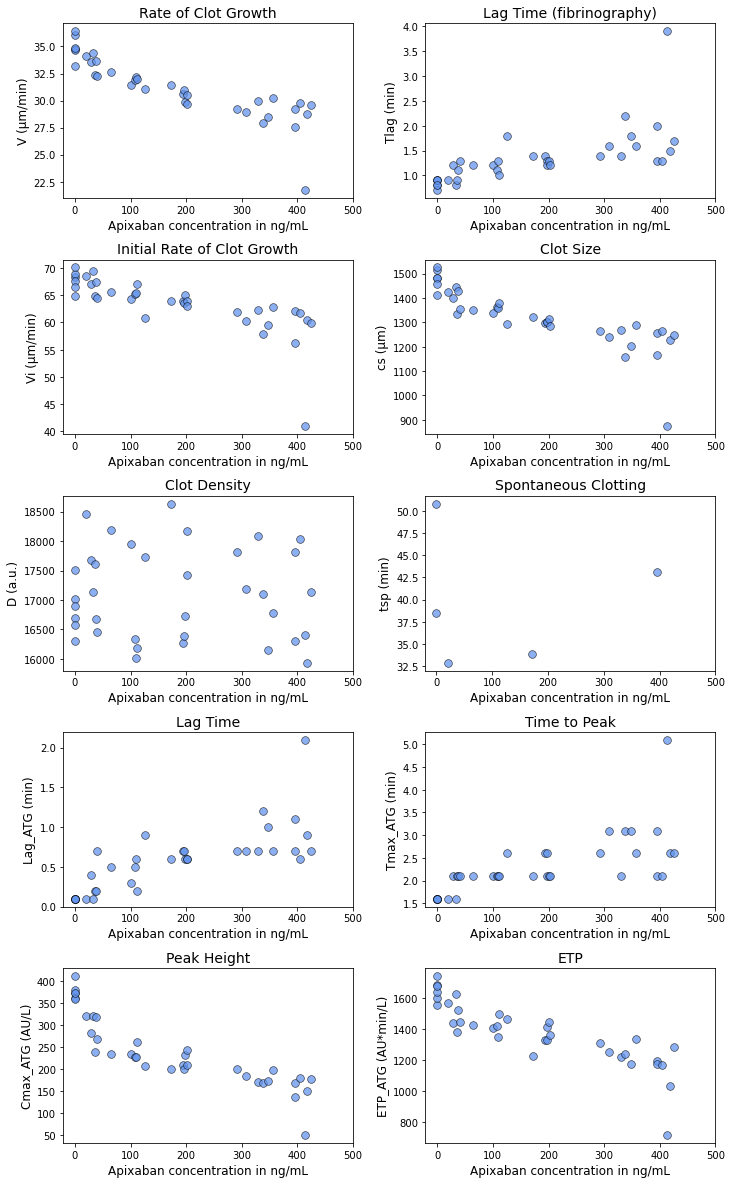

In [6]:
display(HTML("<p class = 'fig_title'>FIGURE: Fibrinographie & thrombinographie <i>in vitro</i> - Apixaban</p>"))

fig1, ax1 = plt.subplots(nrows = 5, ncols = 2, figsize=(11.69, 2*8.27))
fig1.patch.set_facecolor('white')
plt.subplots_adjust(hspace=0.35, wspace=0.25, top=0.98, bottom=0.04)

i = 0
for param in param_td_vitro:
    sns.scatterplot(x = 'conc', y = param, data = pkpd[pkpd['doac'] == 'VA'], color = color_a, edgecolor = 'black', ax = ax1[ax_vitro[i]], s = 60, alpha = 0.75)
    ax1[ax_vitro[i]].set_ylabel(ylabel_vitro[i], fontsize = labelfontsize)
    ax1[ax_vitro[i]].set_xlabel(conc_a, fontsize = labelfontsize)
    ax1[ax_vitro[i]].set_xticks([0, 100, 200, 300, 400, 500])
    ax1[ax_vitro[i]].set_title(vitro_titles[i], size = 14)
    i += 1
    
plt.savefig('vitro_apix')
plt.show()



<h3>Rivaroxaban <i>in vitro</i></h3>

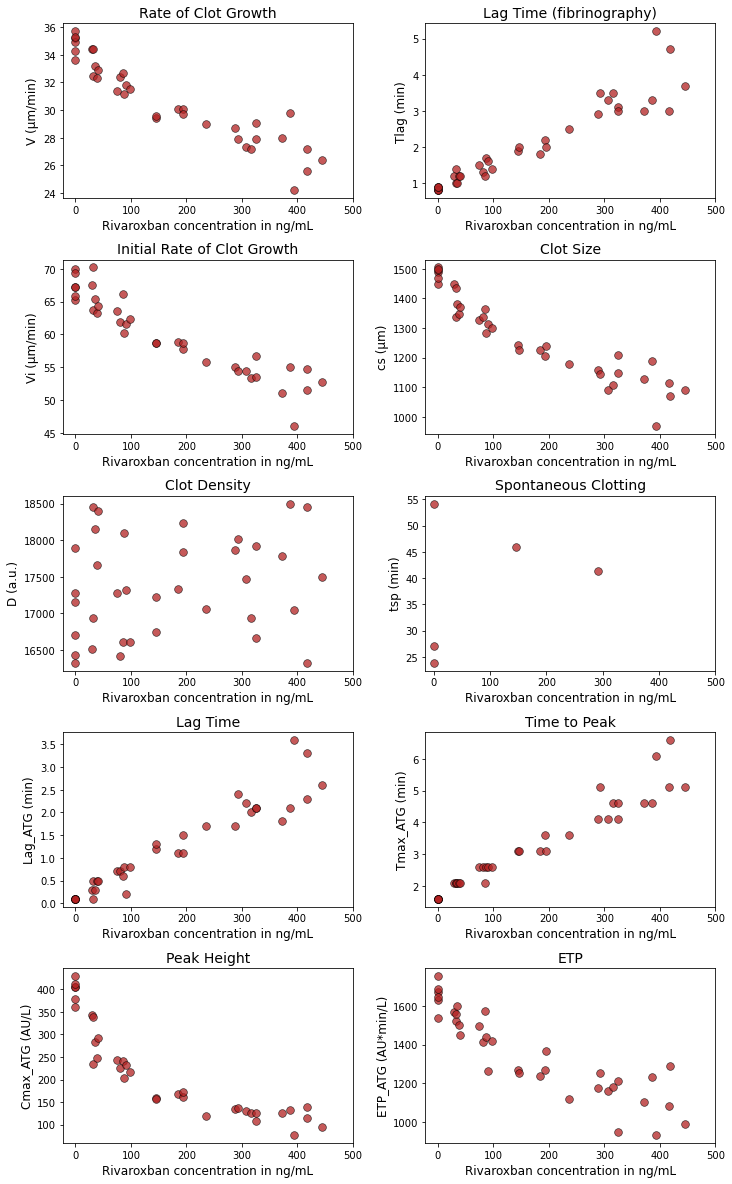

In [7]:
display(HTML("<p class = 'fig_title'>FIGURE: Fibrinographie & thrombinographie <i>in vitro</i> - Rivaroxaban</p>"))

fig2, ax2 = plt.subplots(nrows = 5, ncols = 2, figsize=(11.69, 2*8.27))
fig2.patch.set_facecolor('white')
plt.subplots_adjust(hspace=0.35, wspace=0.25, top=0.98, bottom=0.04)

i = 0
for param in param_td_vitro:
    sns.scatterplot(x = 'conc', y = param, data = pkpd[pkpd['doac'] == 'VR'], color = color_r, edgecolor = 'black', ax = ax2[ax_vitro[i]], s = 60, alpha = 0.75)
    ax2[ax_vitro[i]].set_ylabel(ylabel_vitro[i], fontsize = labelfontsize)
    ax2[ax_vitro[i]].set_xlabel(conc_r, fontsize = labelfontsize)
    ax2[ax_vitro[i]].set_xticks([0, 100, 200, 300, 400, 500])
    ax2[ax_vitro[i]].set_title(vitro_titles[i], size = 14)
    i += 1
    
plt.savefig('vitro_riva')
plt.show()

<h3>Dabigatran <i>in vitro</i></h3>

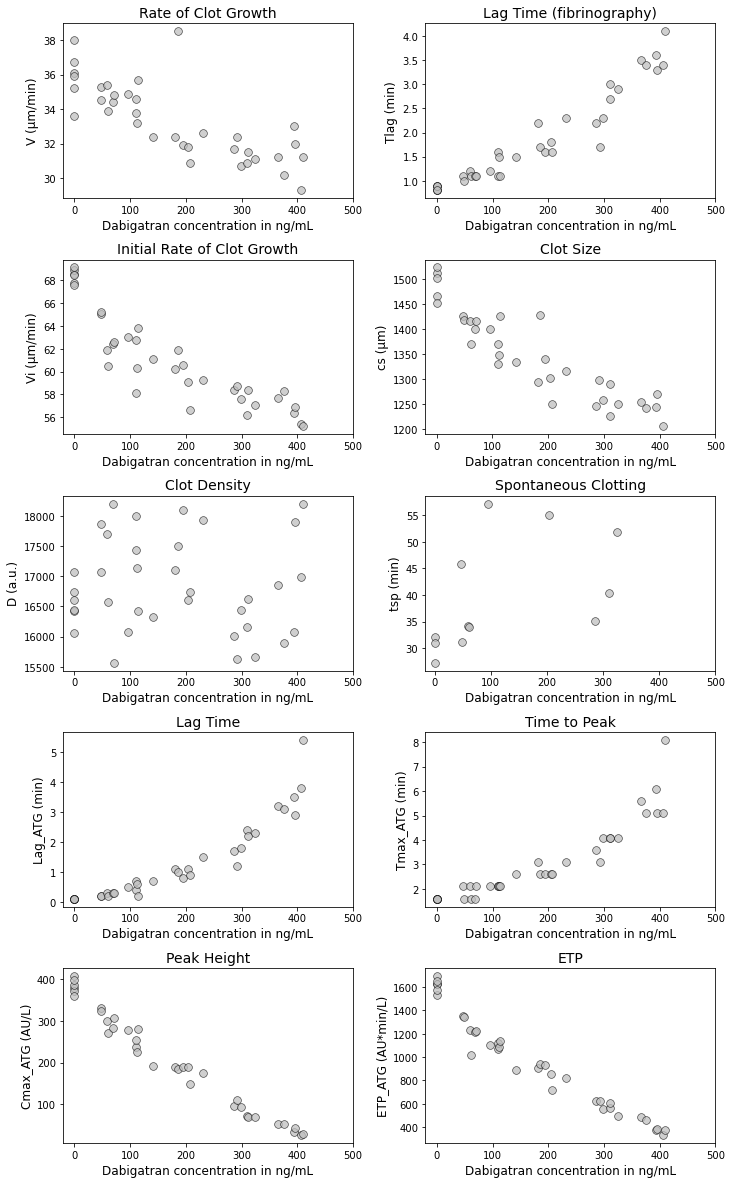

In [8]:
display(HTML("<p class = 'fig_title'>FIGURE: Fibrinographie & thrombinographie <i>in vitro</i> - Dabigatran</p>"))

fig3, ax3 = plt.subplots(nrows = 5, ncols = 2, figsize=(11.69, 2*8.27))
fig3.patch.set_facecolor('white')
plt.subplots_adjust(hspace=0.35, wspace=0.25, top=0.98, bottom=0.04)

i = 0
for param in param_td_vitro:
    sns.scatterplot(x = 'conc', y = param, data = pkpd[pkpd['doac'] == 'VD'], color = color_d, edgecolor = 'black', ax = ax3[ax_vitro[i]], s = 60, alpha = 0.75)
    ax3[ax_vitro[i]].set_ylabel(ylabel_vitro[i], fontsize = labelfontsize)
    ax3[ax_vitro[i]].set_xlabel(conc_d, fontsize = labelfontsize)
    ax3[ax_vitro[i]].set_xticks([0, 100, 200, 300, 400, 500])
    ax3[ax_vitro[i]].set_title(vitro_titles[i], size = 14)
    i += 1
    
plt.savefig('vitro_dabi')
plt.show()

<h3>Apixaban, Rivaroxaban and Dabigatran <i>in vitro</i> on the same figure</h3>

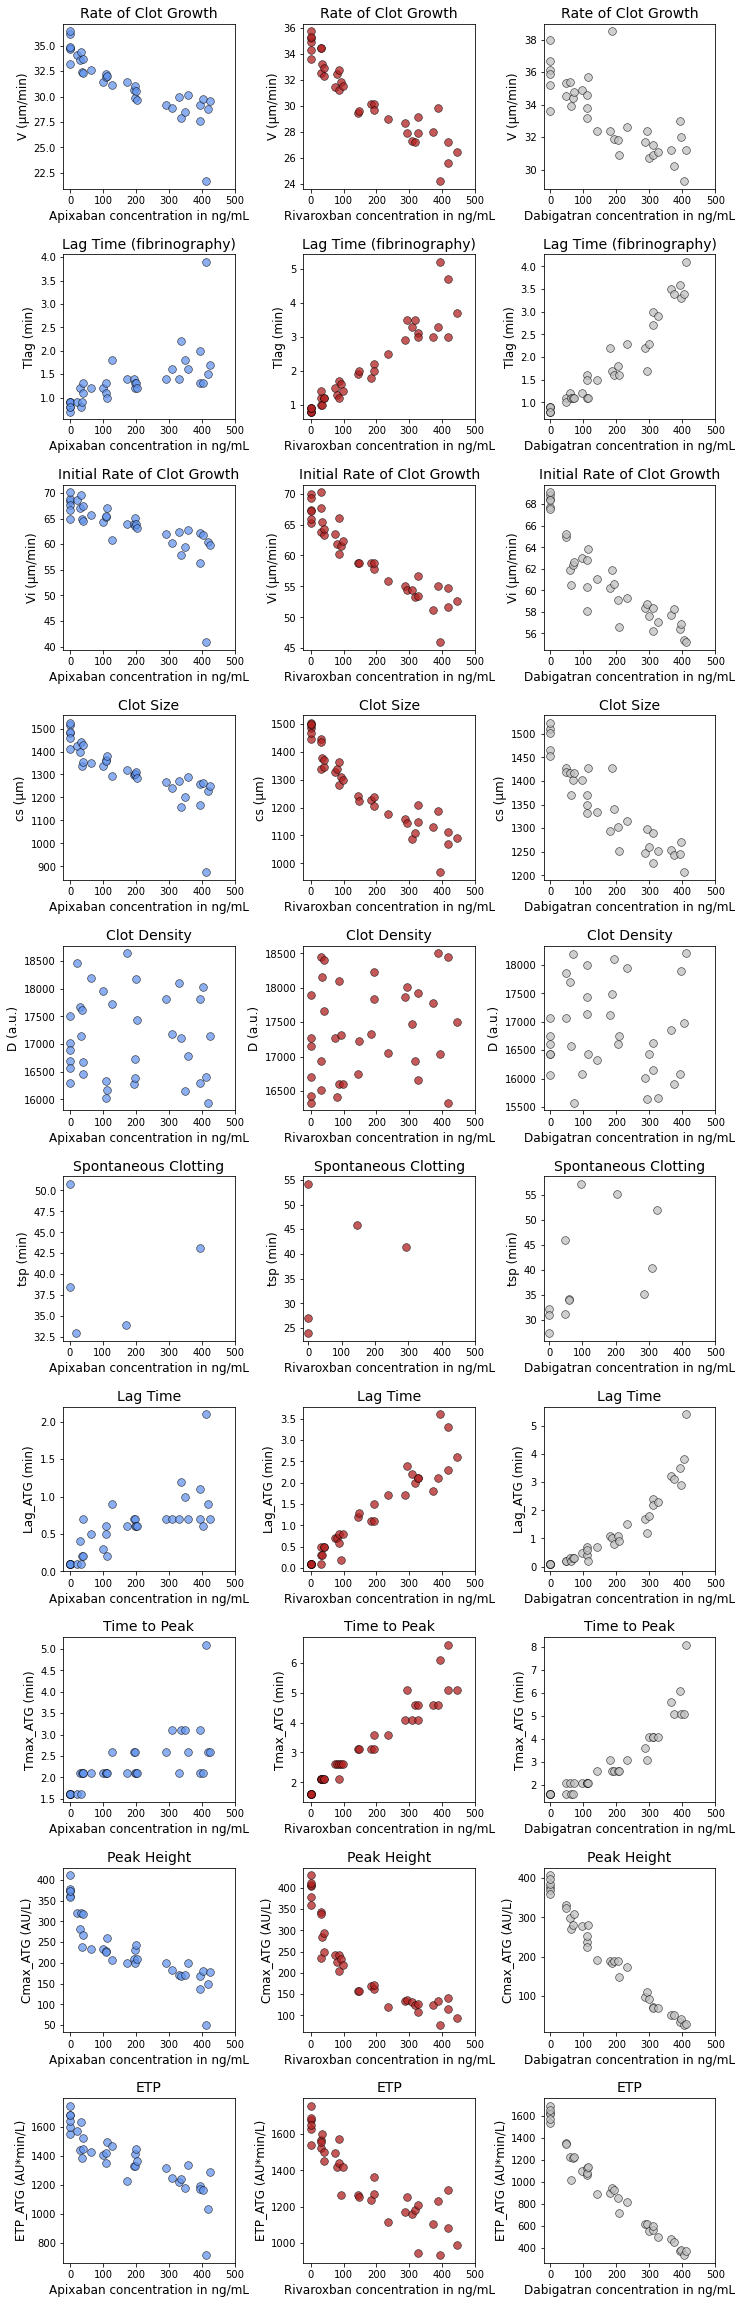

In [9]:
display(HTML("<p class = 'fig_title'>FIGURE: Fibrinographie & thrombinographie - effet des AOD <i>in vitro</i></p>"))

param_td_vitro3 = ['lt_td', 'ph_td', 'etp_td', 'v', 'cs']
ylabel_vitro3 = [lt, ph, etp, v, cs]



fig10, ax10 = plt.subplots(nrows = 10, ncols = 3, figsize=(11.69, 4*8.27))
fig1.patch.set_facecolor('white')
plt.subplots_adjust(hspace=0.40, wspace=0.40, top=0.98, bottom=0.04)

i = 0
for param in param_td_vitro:
    
    #apixaban
    sns.scatterplot(x = 'conc', y = param, data = pkpd[pkpd['doac'] == 'VA'], color = color_a, edgecolor = 'black', ax = ax10[i,0], s = 60, alpha = 0.75)
    ax10[i,0].set_ylabel(ylabel_vitro[i], fontsize = labelfontsize)
    ax10[i,0].set_xlabel(conc_a, fontsize = labelfontsize)
    ax10[i,0].set_xticks([0, 100, 200, 300, 400, 500])
    ax10[i,0].set_title(vitro_titles[i], size = 14)
    
    #rivaroxaban
    sns.scatterplot(x = 'conc', y = param, data = pkpd[pkpd['doac'] == 'VR'], color = color_r, edgecolor = 'black', ax = ax10[i,1], s = 60, alpha = 0.75)
    ax10[i,1].set_ylabel(ylabel_vitro[i], fontsize = labelfontsize)
    ax10[i,1].set_xlabel(conc_r, fontsize = labelfontsize)
    ax10[i,1].set_xticks([0, 100, 200, 300, 400, 500])
    ax10[i,1].set_title(vitro_titles[i], size = 14)
    
    #dabigatran
    sns.scatterplot(x = 'conc', y = param, data = pkpd[pkpd['doac'] == 'VD'], color = color_d, edgecolor = 'black', ax = ax10[i,2], s = 60, alpha = 0.75)
    ax10[i,2].set_ylabel(ylabel_vitro[i], fontsize = labelfontsize)
    ax10[i,2].set_xlabel(conc_d, fontsize = labelfontsize)
    ax10[i,2].set_xticks([0, 100, 200, 300, 400, 500])
    ax10[i,2].set_title(vitro_titles[i], size = 14)
    
    
    i += 1
    
plt.savefig('vitro_all')
plt.show()

<h1>Method comparison: Thrombodynamics <i>vs.</i> ST-Genesia</h1>

In [10]:
df_ba = pkpd[pkpd['doac'].isin(['A', 'R', 'DR', 'VA', 'VR'])]

param_ba = {'lt': ['lt_td', 'lt_ds', 'lt_ts'],
            'ph': ['ph_td', 'ph_ds', 'ph_ts'],
            'etp': ['etp_td', 'etp_ds', 'etp_ts']
           }

param_td = ['lt_td', 'ph_td', 'etp_td']
param_ds = ['lt_ds', 'ph_ds', 'etp_ds']
param_ts = ['lt_ts', 'ph_ts', 'etp_ts']
#param_titles = ['Lag Time', 'Peak Height', 'ETP']
param_titles = ['Lag Time (min)', 'Peak Height (AU/L)*', 'Endogenous Thrombin Potential\n(AU*min/L)*']

ax_ba = [[(0,0), (0,1)], [(1,0), (1,1)], [(2,0), (2,1)]]


marker_dict = {'A': 's', 'VA': 's', 'R': 'o', 'DR': 'o', 'VR': 'o'}
palette_dict = {'A': 'navy', 'VA': 'lightskyblue', 'R': 'firebrick', 'DR': 'orange', 'VR': 'yellow'}

fontsize_subtitle = 14

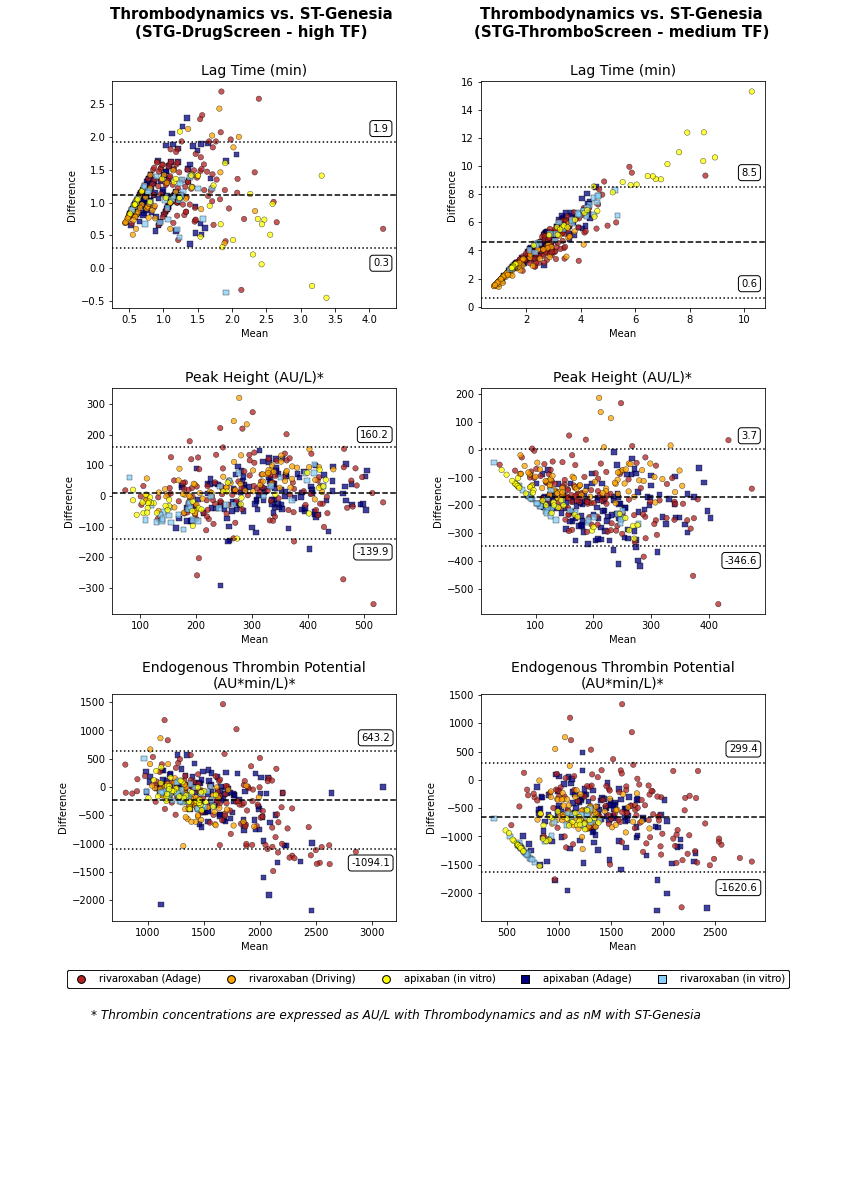

In [11]:
display(HTML("<p class = 'fig_title'>FIGURE: Comparaison de méthode TD vs. STG-DS et vs. STG-TS (-TM)</p>"))

fig4, ax4 = plt.subplots(nrows = 3, ncols = 2, figsize=(11.69, 1.5*8.27))
fig4.patch.set_facecolor('white')
plt.subplots_adjust(hspace=0.35, wspace=0.30, top=0.98, bottom=0.04)

i = 0
for i in range(3):
    df_temp_ds = pkpd[pkpd['doac'].isin(['A', 'R', 'DR', 'VA', 'VR'])][['doac', param_td[i], param_ds[i]]].dropna()
    df_temp_ts = pkpd[pkpd['doac'].isin(['A', 'R', 'DR', 'VA', 'VR'])][['doac', param_td[i], param_ts[i]]].dropna()
    
    df_temp_ds['mean_ds'] = (df_temp_ds[param_ds[i]] + df_temp_ds[param_td[i]])/2
    df_temp_ds['diff_ds'] = df_temp_ds[param_ds[i]] - df_temp_ds[param_td[i]]
    
    df_temp_ts['mean_ts'] = (df_temp_ts[param_ts[i]] + df_temp_ts[param_td[i]])/2
    df_temp_ts['diff_ts'] = df_temp_ts[param_ts[i]] - df_temp_ts[param_td[i]]

    
    #plotting TD vs. DS
    
    sns.scatterplot(x='mean_ds', y='diff_ds', hue = 'doac', hue_order = ["R", "DR", "VR", "A", "VA"], data = df_temp_ds, 
                    s=30, ax=ax4[ax_ba[i][0]], alpha = 0.75, edgecolor = 'black', style='doac', 
                    markers=marker_dict, palette=palette_dict)
    ax4[ax_ba[i][0]].axhline(np.mean(df_temp_ds['diff_ds']), color='black', linestyle='--')
    ax4[ax_ba[i][0]].axhline(np.mean(df_temp_ds['diff_ds']) + 1.96*np.std(df_temp_ds['diff_ds']), color='black', linestyle=':')
    ax4[ax_ba[i][0]].axhline(np.mean(df_temp_ds['diff_ds']) - 1.96*np.std(df_temp_ds['diff_ds']), color='black', linestyle=':')
    ax4[ax_ba[i][0]].set_xlabel('Mean')
    ax4[ax_ba[i][0]].set_ylabel('Difference')
    ax4[ax_ba[i][0]].text(1.02*np.max(df_temp_ds['mean_ds']), np.mean(df_temp_ds['diff_ds']) + 1.2*1.96*np.std(df_temp_ds['diff_ds']), f"{np.mean(df_temp_ds['diff_ds']) + 1.96*np.std(df_temp_ds['diff_ds']):.1f}", ha= 'right', bbox = {'facecolor' : 'white', 'edgecolor' : 'black', 'boxstyle' : 'round'})
    ax4[ax_ba[i][0]].text(1.02*np.max(df_temp_ds['mean_ds']), np.mean(df_temp_ds['diff_ds']) - 1.35*1.96*np.std(df_temp_ds['diff_ds']), f"{np.mean(df_temp_ds['diff_ds']) - 1.96*np.std(df_temp_ds['diff_ds']):.1f}", ha= 'right', bbox = {'facecolor' : 'white', 'edgecolor' : 'black', 'boxstyle' : 'round'})
    ax4[ax_ba[i][0]].set_title(param_titles[i], fontsize = fontsize_subtitle)
    
    legend = ax4[ax_ba[i][0]].legend()
    
    handles, labels = ax4[ax_ba[i][0]].get_legend_handles_labels()
    for ha in handles:
        ha.set_edgecolor("black")
        ha.set_sizes([60])
        
    legend.remove()
    legend_ax = fig4.add_axes([0, -0.25, 1, 0.05])
    legend_ax.legend(handles=handles, labels = ['rivaroxaban (Adage)', 'rivaroxaban (Driving)', 'apixaban (in vitro)', 'apixaban (Adage)', 'rivaroxaban (in vitro)'], loc='center', ncol=len(df_temp_ds['doac'].unique()),
                 bbox_to_anchor=(0.5, 4.5), edgecolor = 'black')
    legend_ax.axis('off')
    
    #plotting TD vs. TS
    
    sns.scatterplot(x='mean_ts', y='diff_ts', hue = 'doac', hue_order = ["R", "DR", "VR", "A", "VA"], data = df_temp_ts, 
                    s=30, ax=ax4[ax_ba[i][1]], alpha = 0.75, edgecolor = 'black', style='doac', 
                    markers=marker_dict, palette=palette_dict)
    ax4[ax_ba[i][1]].axhline(np.mean(df_temp_ts['diff_ts']), color='black', linestyle='--')
    ax4[ax_ba[i][1]].axhline(np.mean(df_temp_ts['diff_ts']) + 1.96*np.std(df_temp_ts['diff_ts']), color='black', linestyle=':')
    ax4[ax_ba[i][1]].axhline(np.mean(df_temp_ts['diff_ts']) - 1.96*np.std(df_temp_ts['diff_ts']), color='black', linestyle=':')
    ax4[ax_ba[i][1]].set_xlabel('Mean')
    ax4[ax_ba[i][1]].set_ylabel('Difference')
    ax4[ax_ba[i][1]].text(1.02*np.max(df_temp_ts['mean_ts']), np.mean(df_temp_ts['diff_ts']) + 1.2*1.96*np.std(df_temp_ts['diff_ts']), f"{np.mean(df_temp_ts['diff_ts']) + 1.96*np.std(df_temp_ts['diff_ts']):.1f}", ha= 'right', bbox = {'facecolor' : 'white', 'edgecolor' : 'black', 'boxstyle' : 'round'})
    if param_titles[i] == 'Lag Time (min)':
        ax4[ax_ba[i][1]].text(1.02*np.max(df_temp_ts['mean_ts']), np.mean(df_temp_ts['diff_ts']) - 0.8*1.96*np.std(df_temp_ts['diff_ts']), f"{np.mean(df_temp_ts['diff_ts']) - 1.96*np.std(df_temp_ts['diff_ts']):.1f}", ha= 'right', bbox = {'facecolor' : 'white', 'edgecolor' : 'black', 'boxstyle' : 'round'})
    else:
        ax4[ax_ba[i][1]].text(1.02*np.max(df_temp_ts['mean_ts']), np.mean(df_temp_ts['diff_ts']) - 1.35*1.96*np.std(df_temp_ts['diff_ts']), f"{np.mean(df_temp_ts['diff_ts']) - 1.96*np.std(df_temp_ts['diff_ts']):.1f}", ha= 'right', bbox = {'facecolor' : 'white', 'edgecolor' : 'black', 'boxstyle' : 'round'})
    ax4[ax_ba[i][1]].set_title(param_titles[i], fontsize = fontsize_subtitle)
    
    legend2 = ax4[ax_ba[i][1]].legend()
    legend2.remove()
    
   
    i+=1
    
fig4.text(0.1, -0.07, '* Thrombin concentrations are expressed as AU/L with Thrombodynamics and as nM with ST-Genesia', ha = 'left', fontstyle = 'italic', fontsize = 12)
fig4.text(0.29, 1.03, 'Thrombodynamics vs. ST-Genesia\n(STG-DrugScreen - high TF)', ha = 'center', fontsize = 15, fontweight = 'bold')
fig4.text(0.73, 1.03, 'Thrombodynamics vs. ST-Genesia\n(STG-ThromboScreen - medium TF)', ha = 'center', fontsize = 15, fontweight = 'bold')

plt.savefig('comparison_td_ds')

plt.show()

<h1>Effect of xabans on thrombinography and fibrinography parameters in elderly patients.</h1>

In [12]:
ax_doac = [(0,0), (0,1), (1,0), (1,1), (2,0), (2,1), (3,0), (3,1)]
param_doac = ['v', 'ltfib', 'cs', 'd', 'lt_td', 'ttp_td', 'ph_td', 'etp_td']

param_ylabel = ['V (µm/min)', 'Tlag (min)', 'CS (µm)', 'D (a.u.)',
                'Lag_ATG (min)', 'Tmax_ATG (min)', 'Cmax_ATG (AU/L)', 'ETP_ATG (AU*min/L)']

#['Lag_ATG (min)', 'Tmax_ATG (min)', 'Cmax_ATG (AU/L)', 'ETP_ATG (AU*min/L)', 'Ast (AU/L)', 'Vt (µm/min)',
#               'V (µm/min)', 'Tlag (min)', 'D (a.u.)']
param_title = ['Rate of Clot Growth', 'Lag Time\n(fibrinography)', 'Clot size', 'Clot Density',
                'Lag Time', 'Time to Peak', 'Peak Height', 'ETP']

#['Lag Time', 'Time to Peak', 'Peak Height', 'ETP', 'Stationary Amplitude of\nThrombin Peak', 'Rate of Thrombin Peak\nPropagation',
 #             'Rate of Clot Growth', 'Lag Time\n(fibrinography)', 'Clot Density']

palette_apix = {2.5: 'lightskyblue', 5.0 : 'navy'}
palette_riva = {10.0 : 'gainsboro', 15.0 : 'yellow', 20.0 : 'darkred'}
palette_dabi = {75.0 : 'white', 110.0 : 'silver', 150.0 : 'black'}

<h3>Apixaban</h3>

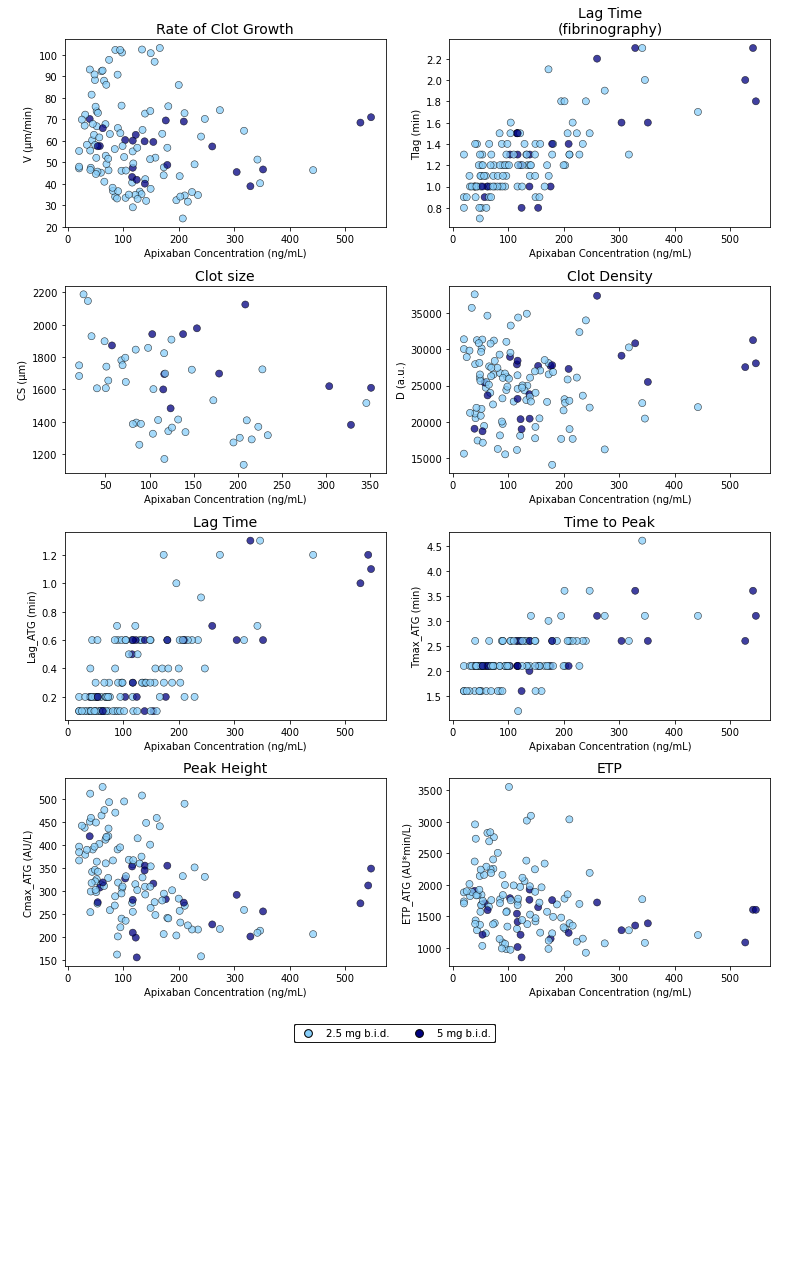

In [13]:
display(HTML("<p class = 'fig_title'>FIGURE: Fibrinographie & thrombinographie chez les patients ADAGE Apixaban</p>"))

fig5, ax5 = plt.subplots(nrows = 4, ncols = 2, figsize=(1.3*8.27, 1.7*8.27))
fig5.patch.set_facecolor('white')
plt.subplots_adjust(hspace=0.25, wspace=0.25, top=0.98, bottom=0.04)

i = 0

for param in param_doac:
    sns.scatterplot(x = 'conc', y = param_doac[i], data = pkpd[pkpd['doac'] == 'A'],hue = 'dosing', edgecolor = 'black', ax = ax5[ax_doac[i]], s = 50, alpha = 0.75,
               palette=palette_apix)
    ax5[ax_doac[i]].set_title(param_title[i], fontsize = fontsize_subtitle)
    ax5[ax_doac[i]].set_ylabel(param_ylabel[i])
    ax5[ax_doac[i]].set_xlabel('Apixaban Concentration (ng/mL)')
    ax5[ax_doac[i]].legend().remove()
    
    legend_apix = ax5[ax_doac[i]].legend()
    
    handles, labels = ax5[ax_doac[i]].get_legend_handles_labels()
    for ha in handles:
        ha.set_edgecolor("black")
        ha.set_sizes([60])
    legend_apix.remove()
    legend_apix_ax = fig5.add_axes([0, -0.25, 1, 0.05])
    legend_apix_ax.legend(handles=handles, labels = ['2.5 mg b.i.d.', '5 mg b.i.d.'], loc='center', ncol=len(df_temp_ds['doac'].unique()),
                 bbox_to_anchor=(0.5, 4.5), edgecolor = 'black')
    legend_apix_ax.axis('off')   
    
    i += 1
plt.tight_layout()

plt.savefig('adage_apix')

plt.show()

<h3>Rivaroxaban</h3>

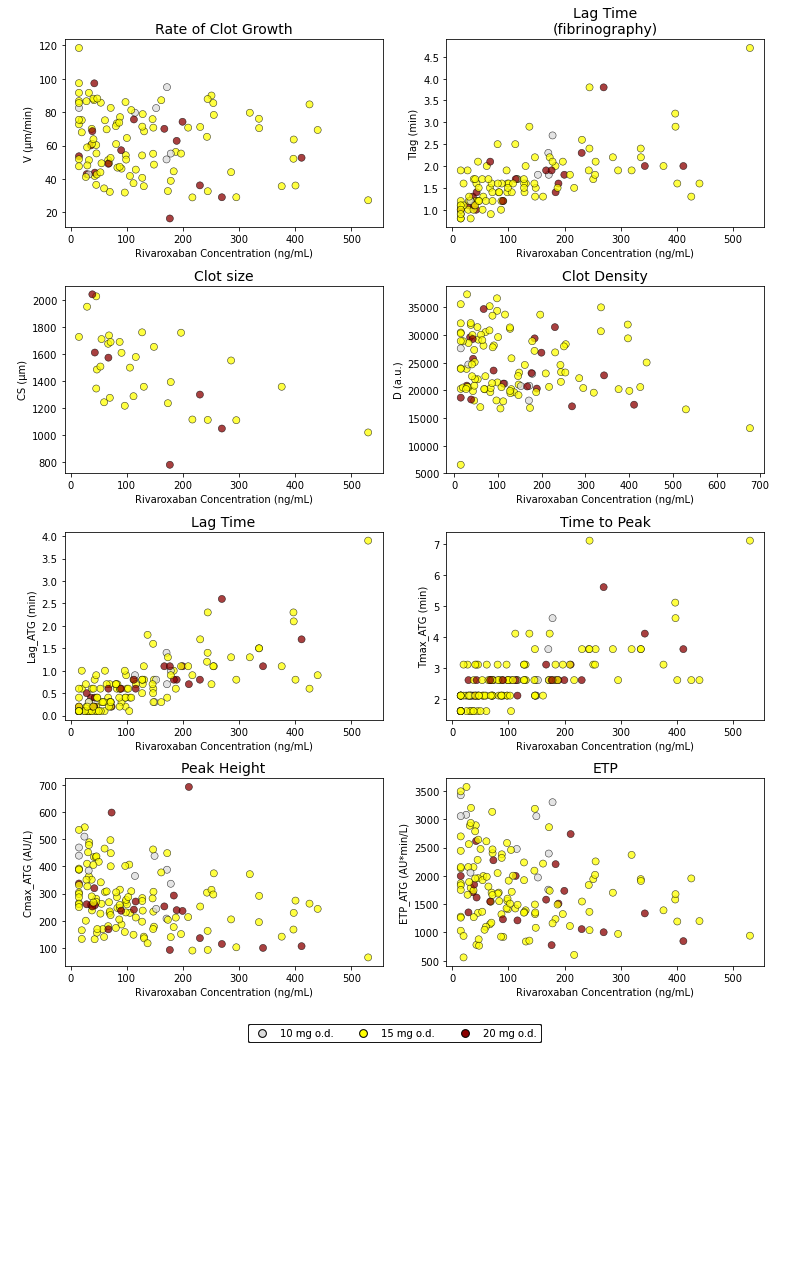

In [14]:
display(HTML("<p class = 'fig_title'>FIGURE: Fibrinographie & thrombinographie chez les patients ADAGE Rivaroxaban</p>"))

fig6, ax6 = plt.subplots(nrows = 4, ncols = 2, figsize=(1.3*8.27, 1.7*8.27))
fig6.patch.set_facecolor('white')
fig6.subplots_adjust(hspace=0.25, wspace=0.25, top=0.98, bottom=0.04)

i = 0

for param in param_doac:
    sns.scatterplot(x = 'conc', y = param_doac[i], data = pkpd[pkpd['doac'] == 'R'],hue = 'dosing', edgecolor = 'black', ax = ax6[ax_doac[i]], s = 50, alpha = 0.75,
               palette=palette_riva)
    ax6[ax_doac[i]].set_title(param_title[i], fontsize = fontsize_subtitle)
    ax6[ax_doac[i]].set_ylabel(param_ylabel[i])
    ax6[ax_doac[i]].set_xlabel('Rivaroxaban Concentration (ng/mL)')
    ax6[ax_doac[i]].legend().remove()
    
    legend_riva = ax6[ax_doac[i]].legend()
    handles, labels = ax6[ax_doac[i]].get_legend_handles_labels()

    for ha in handles:
        ha.set_edgecolor("black")
        ha.set_sizes([60])
    legend_riva.remove()
    legend_riva_ax = fig6.add_axes([0, -0.25, 1, 0.05])
    legend_riva_ax.legend(handles=handles, labels = ['10 mg o.d.', '15 mg o.d.', '20 mg o.d.'], loc='center', ncol=len(df_temp_ds['doac'].unique()),
                 bbox_to_anchor=(0.5, 4.5), edgecolor = 'black')
    legend_riva_ax.axis('off')   
    
    i += 1
plt.tight_layout()

plt.savefig('adage_riva')

plt.show()

<h3>Dabigatran</h3>

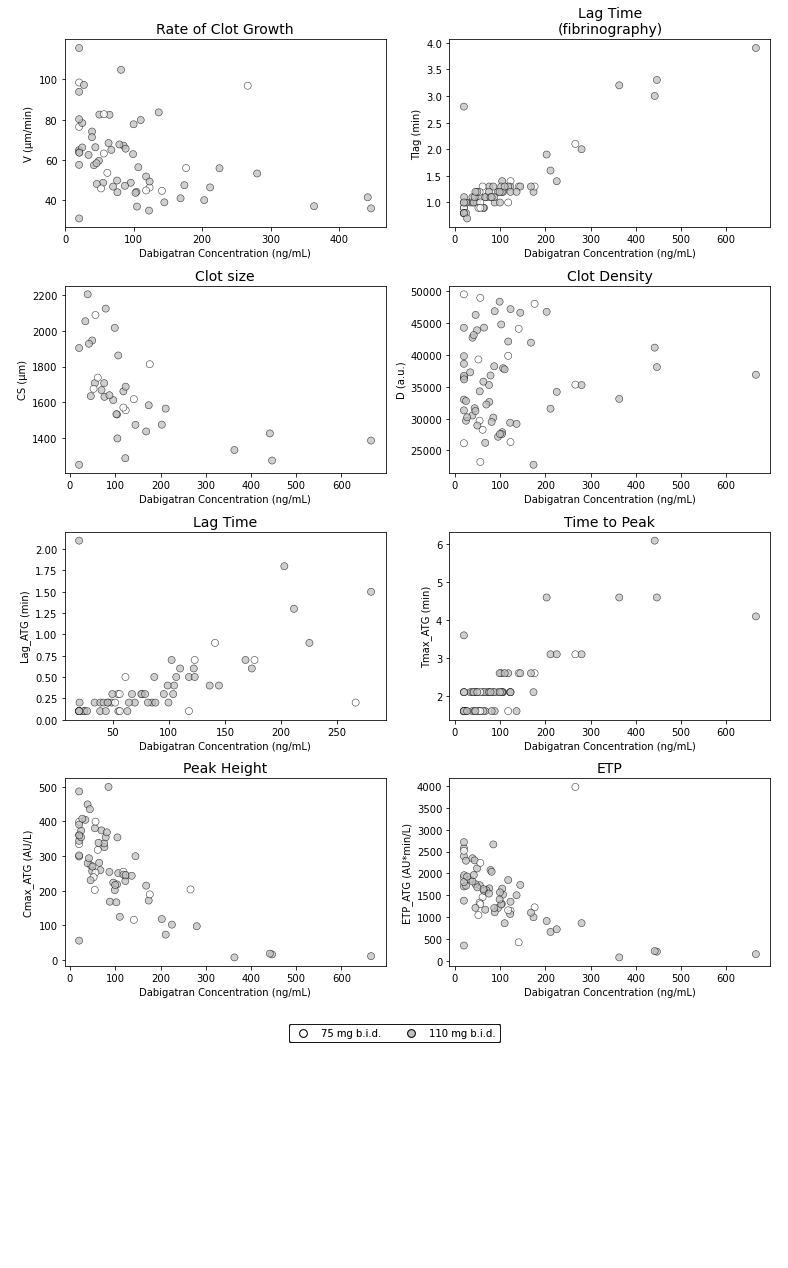

In [15]:
display(HTML("<p class = 'fig_title'>FIGURE: Fibrinographie & thrombinographie chez les patients ADAGE Dabigatran</p>"))

fig7, ax7 = plt.subplots(nrows = 4, ncols = 2, figsize=(1.3*8.27, 1.7*8.27))
fig7.patch.set_facecolor('white')
fig7.subplots_adjust(hspace=0.25, wspace=0.25, top=0.98, bottom=0.04)

i = 0

for param in param_doac:
    sns.scatterplot(x = 'conc', y = param_doac[i], data = pkpd[pkpd['doac'] == 'D'],hue = 'dosing', edgecolor = 'black', ax = ax7[ax_doac[i]], s = 50, alpha = 0.75,
               palette=palette_dabi)
    ax7[ax_doac[i]].set_title(param_title[i], fontsize = fontsize_subtitle)
    ax7[ax_doac[i]].set_ylabel(param_ylabel[i])
    ax7[ax_doac[i]].set_xlabel('Dabigatran Concentration (ng/mL)')
 
    
    legend_dabi = ax7[ax_doac[i]].legend()
    handles, labels = ax7[ax_doac[i]].get_legend_handles_labels()

    for ha in handles:
        ha.set_edgecolor("black")
        ha.set_sizes([60])
    legend_dabi.remove()
    legend_dabi_ax = fig7.add_axes([0, -0.25, 1, 0.05])
    legend_dabi_ax.legend(handles=handles, labels = ['75 mg b.i.d.', '110 mg b.i.d.', '150 mg b.i.d.'], loc='center', ncol=len(df_temp_ds['doac'].unique()),
                 bbox_to_anchor=(0.5, 4.5), edgecolor = 'black')
    legend_dabi_ax.axis('off')   
    
    i += 1
    

plt.tight_layout()

plt.savefig('adage_dabi')
plt.show()

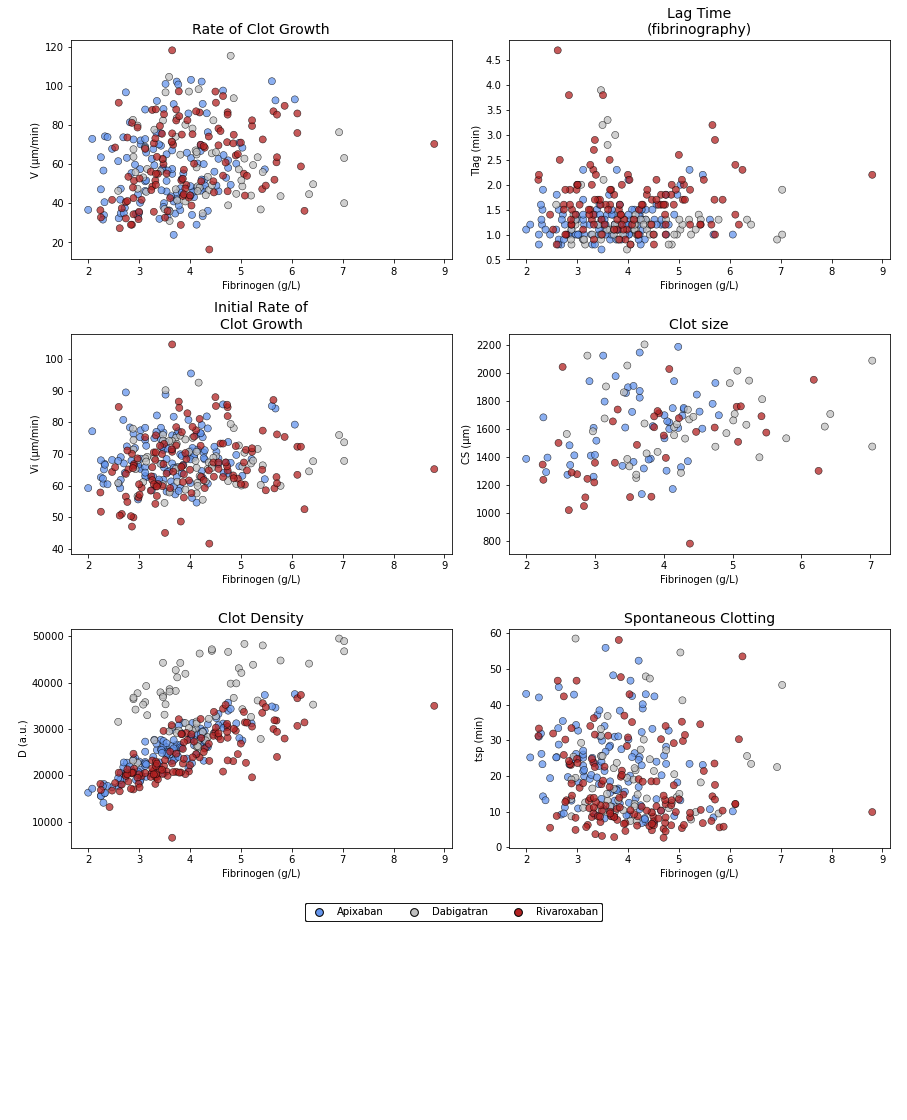

In [16]:
with open("CSS_adage_td", 'r') as f:
    CSS_style = f.read()

display(HTML(f'<style>{CSS_style}</style'))

ax_doac = [(0,0), (0,1), (1,0), (1,1), (2,0), (2,1)]
param_fib = ['v', 'ltfib', 'vi', 'cs', 'd', 'tsp']

param_ylabel_fib = ['V (µm/min)', 'Tlag (min)', 'Vi (µm/min)',
                'CS (µm)', 'D (a.u.)', 'tsp (min)'
                ]

param_title_fib = ['Rate of Clot Growth', 'Lag Time\n(fibrinography)', 'Initial Rate of\nClot Growth',
               'Clot size', 'Clot Density', 'Spontaneous Clotting']

pkpd_adage = pkpd[pkpd['doac'].isin(['A', 'R', 'D'])]

palette_ard = {'A' : color_a, 'R' : color_r, 'D' : color_d}

#------------------------------------------------------------------------------
display(HTML("<p class = 'fig_title'>FIGURE: Paramètres de fibrinographie (tout AOD) en fonction du fibrinogène</p>"))
fig15, ax15 = plt.subplots(nrows = 3, ncols = 2, figsize=(1.5*8.27, 1.5*8.27))
fig15.patch.set_facecolor('white')
fig15.subplots_adjust(hspace=0.25, wspace=0.25, top=0.98, bottom=0.04)

i = 0

for param in param_fib:
    sns.scatterplot(x = 'fib', y = param, data = pkpd_adage, hue = 'doac', edgecolor = 'black', ax = ax15[ax_doac[i]], s = 50, alpha = 0.75,
               palette=palette_ard)
    ax15[ax_doac[i]].set_title(param_title_fib[i], fontsize = fontsize_subtitle)
    ax15[ax_doac[i]].set_ylabel(param_ylabel_fib[i])
    ax15[ax_doac[i]].set_xlabel('Fibrinogen (g/L)')
    ax15[ax_doac[i]].legend().remove()
    
    legend_fig = ax15[ax_doac[i]].legend()
    handles, labels = ax15[ax_doac[i]].get_legend_handles_labels()

    for ha in handles:
        ha.set_edgecolor("black")
        ha.set_sizes([60])
    legend_fig.remove()
    legend_fig_ax = fig15.add_axes([0, -0.25, 1, 0.05])
    legend_fig_ax.legend(handles=handles, labels = ['Apixaban', 'Dabigatran', 'Rivaroxaban'], loc='center', ncol=len(df_temp_ds['doac'].unique()),
                 bbox_to_anchor=(0.5, 4.5), edgecolor = 'black')
    legend_fig_ax.axis('off')   
    
    i += 1
plt.tight_layout()

plt.savefig('adage_td_fib')

plt.show()

<h1>Thrombinography parameters variability in elderly patients compared to male healthy volunteers</h1>

In [17]:
#setting driving is_cmax value
dr_cmax_id = pkpd[(pkpd['doac'] == 'DR') & (pkpd['delta_intake_sampling'].isin([0.5, 1.0, 1.5, 2.0, 3.0, 4.0]))]['id'].unique()
dr_cmax = {}

for id in dr_cmax_id:
    df_temp = pkpd[(pkpd['delta_intake_sampling'].isin([0.5, 1.0, 1.5, 2.0, 3.0, 4.0])) & (pkpd['doac'] == 'DR') & (pkpd['id'] == id) & ~(pkpd['lt_td'].isna())]
    dr_cmax[id] = np.max(df_temp['conc'])

pkpd['is_cmax'] = pkpd.apply(lambda row: 1 if row['id'] in dr_cmax and row['conc'] == dr_cmax[row['id']] else row['is_cmax'], axis=1)

param_swarm_df = ['doac', 'conc','lt_td', 'ttp_td', 'ph_td', 'etp_td', 'v', 'ltfib', 'cs', 'd']
param_swarm = ['ph_td', 'etp_td', 'v', 'd']
titles_swarm = ['Peak Height', 'Endogenous Thrombin Potential', 'Rate of Clot Growth', 'Clot Density']
ylabels_swarm = ['Cmax_ATG (AU/L)', 'ETP_ATG (AU*min/L)', 'V (µm/min)', 'D (a.u.)']
ax_var = [(0,0), (0,1), (1,0), (1,1)]
fontsize_subtitle = 14

palette_swarm = {'DR_t0' : 'green',
 'DR_cmax' : 'orange',
 'DR_cmin' : 'yellow',
 'a_cmax' : 'navy',
 'a_cmin' : 'lightskyblue',
 'r_cmax' : 'firebrick',
 'r_cmin' : 'lightsalmon',
 'd_cmax' : 'silver',
 'd_cmin' : 'white'
}

#driving T0
swarm_dr_t0 = pkpd[(pkpd['doac'] == 'DR') & (pkpd['delta_intake_sampling'] == 0)][param_swarm_df].copy()
swarm_dr_t0['class'] = 'DR_t0'

#driving Cmax
swarm_dr_cmax = pkpd[(pkpd['doac'] == 'DR') & (pkpd['is_cmax'] == 1)][param_swarm_df].copy()
swarm_dr_cmax['class'] = 'DR_cmax'


#driving Cmin
swarm_dr_cmin= pkpd[(pkpd['doac'] == 'DR') & (pkpd['delta_intake_sampling'] == 24)][param_swarm_df].copy()
swarm_dr_cmin['class'] = 'DR_cmin'


#Apix Cmax
swarm_a_cmax = pkpd[(pkpd['doac'] == 'A') & (pkpd['is_cmax'] == 1)][param_swarm_df].copy()
swarm_a_cmax['class'] = 'a_cmax'

#Apix Cmin
swarm_a_cmin= pkpd[(pkpd['doac'] == 'A') & (pkpd['is_cmin'] == 1)][param_swarm_df].copy()
swarm_a_cmin['class'] = 'a_cmin'

#Riva Cmax
swarm_r_cmax = pkpd[(pkpd['doac'] == 'R') & (pkpd['is_cmax'] == 1)][param_swarm_df].copy()
swarm_r_cmax['class'] = 'r_cmax'

#Riva Cmin
swarm_r_cmin= pkpd[(pkpd['doac'] == 'R') & (pkpd['is_cmin'] == 1)][param_swarm_df].copy()
swarm_r_cmin['class'] = 'r_cmin'

#Dabi Cmax
swarm_d_cmax = pkpd[(pkpd['doac'] == 'D') & (pkpd['is_cmax'] == 1)][param_swarm_df].copy()
swarm_d_cmax['class'] = 'd_cmax'


#Dabi Cmin
swarm_d_cmin= pkpd[(pkpd['doac'] == 'D') & (pkpd['is_cmin'] == 1)][param_swarm_df].copy()
swarm_d_cmin['class'] = 'd_cmin'

swarm_df = pd.concat([swarm_a_cmax, swarm_a_cmin, swarm_r_cmax,
                     swarm_r_cmin, swarm_d_cmax, swarm_d_cmin])

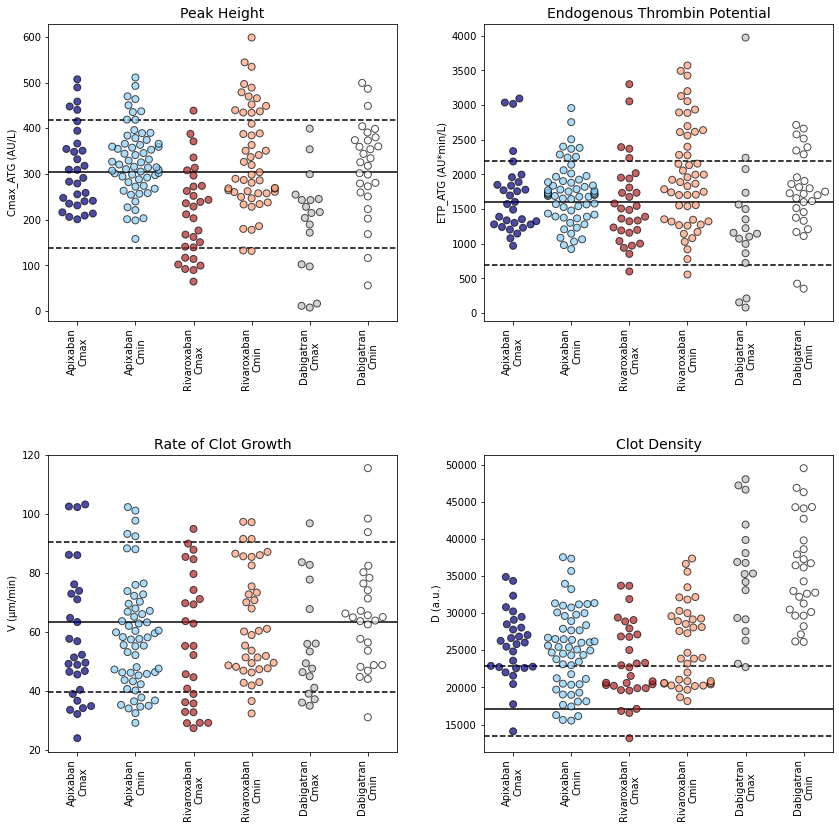

In [19]:
fig8, ax8 = plt.subplots(nrows=2, ncols=2, figsize=(1.7*8.27, 1.3*8.27))
fig8.patch.set_facecolor('white')
plt.subplots_adjust(hspace=0.45, wspace=0.25, top=0.98, bottom=0.04)

i = 0
for param in param_swarm:
    sns.swarmplot(x='class', y=param_swarm[i], data=swarm_df, ax=ax8[ax_var[i]], palette=palette_swarm, alpha=0.7, size=7, linewidth=1, edgecolor='black')
    ax8[ax_var[i]].set_xticklabels(['Apixaban\nCmax', 'Apixaban\nCmin', 'Rivaroxaban\nCmax','Rivaroxaban\nCmin', 'Dabigatran\nCmax', 'Dabigatran\nCmin'], rotation = 90)
    ax8[ax_var[i]].set_xlabel('')
    ax8[ax_var[i]].set_ylabel(ylabels_swarm[i])
    ax8[ax_var[i]].set_title(titles_swarm[i], fontsize=fontsize_subtitle)
    
    ax8[ax_var[i]].axhline(np.mean(swarm_dr_t0[param_swarm[i]]), color='black', linestyle='solid')
    ax8[ax_var[i]].axhline(ci_95(swarm_dr_t0[param_swarm[i]])[0], color='black', linestyle='--')
    ax8[ax_var[i]].axhline(ci_95(swarm_dr_t0[param_swarm[i]])[1], color='black', linestyle='--')

    i += 1
    
plt.savefig('var_light')

plt.show()


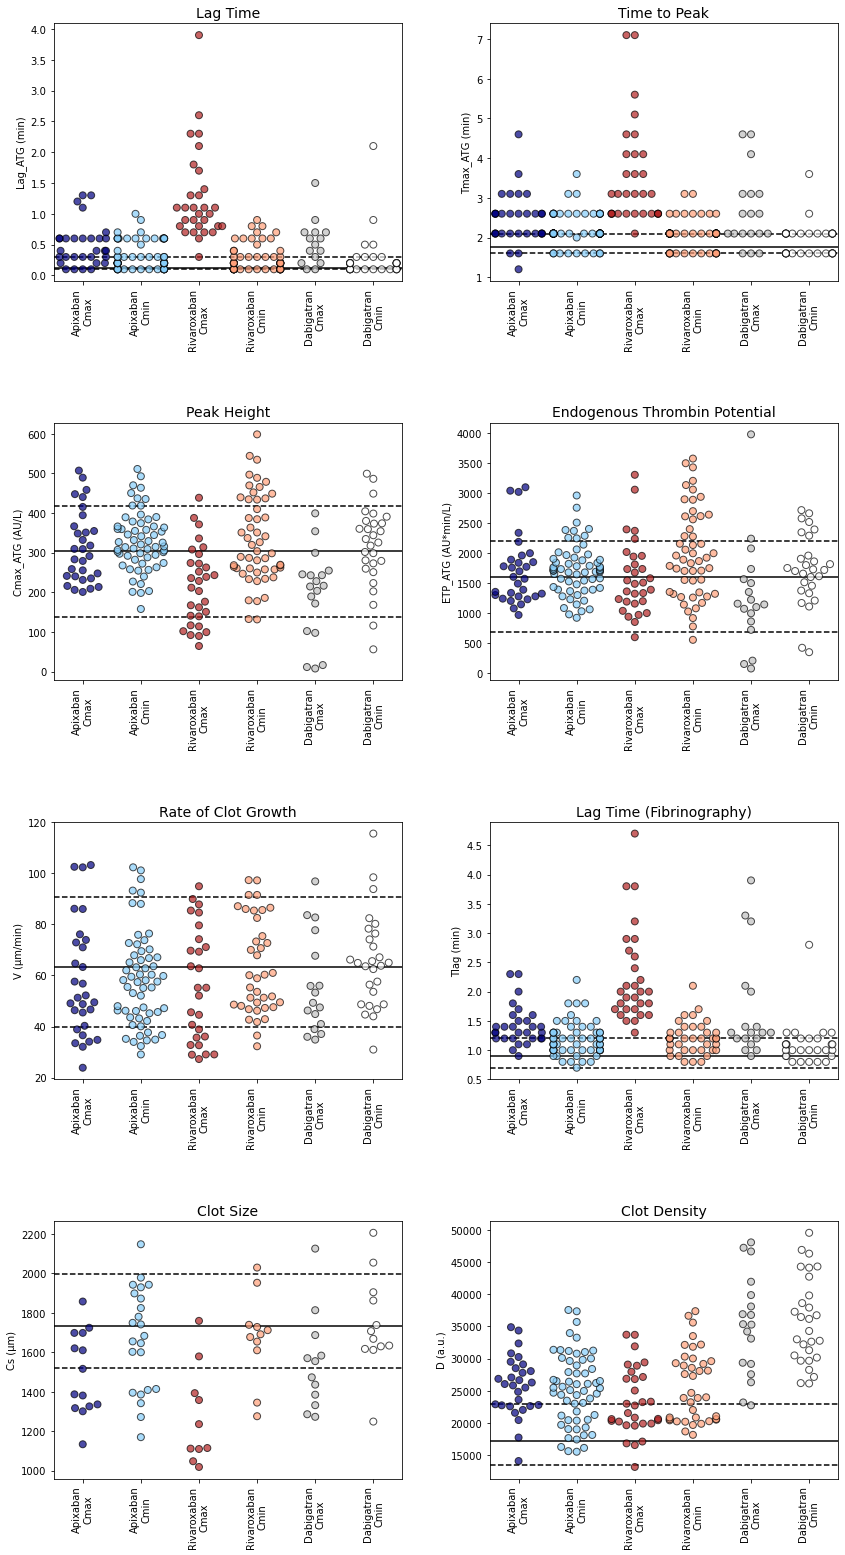

In [20]:
fig9, ax9 = plt.subplots(nrows=4, ncols=2, figsize=(1.7*8.27, 2.6*8.27))
fig9.patch.set_facecolor('white')
plt.subplots_adjust(hspace=0.55, wspace=0.25, top=0.98, bottom=0.04)


param_swarm2 = ['lt_td', 'ttp_td', 'ph_td', 'etp_td', 'v', 'ltfib', 'cs', 'd']
titles_swarm2 = ['Lag Time', 'Time to Peak','Peak Height', 'Endogenous Thrombin Potential', 'Rate of Clot Growth', 'Lag Time (Fibrinography)', 'Clot Size', 'Clot Density']
ylabels_swarm2 = ['Lag_ATG (min)', 'Tmax_ATG (min)', 'Cmax_ATG (AU/L)', 'ETP_ATG (AU*min/L)', 'V (µm/min)', 'Tlag (min)', 'Cs (µm)', 'D (a.u.)']
ax_var2 = [(0,0), (0,1), (1,0), (1,1), (2,0), (2,1), (3,0), (3,1)]



i = 0
for param in param_swarm2:
    sns.swarmplot(x='class', y=param_swarm2[i], data=swarm_df, ax=ax9[ax_var2[i]], palette=palette_swarm, alpha=0.7, size=7, linewidth=1, edgecolor='black')
    ax9[ax_var2[i]].set_xticklabels(['Apixaban\nCmax', 'Apixaban\nCmin', 'Rivaroxaban\nCmax','Rivaroxaban\nCmin', 'Dabigatran\nCmax', 'Dabigatran\nCmin'], rotation = 90)
    ax9[ax_var2[i]].set_xlabel('')
    ax9[ax_var2[i]].set_ylabel(ylabels_swarm2[i])
    ax9[ax_var2[i]].set_title(titles_swarm2[i], fontsize=fontsize_subtitle)
    
    ax9[ax_var2[i]].axhline(np.mean(swarm_dr_t0[param_swarm2[i]]), color='black', linestyle='solid')
    ax9[ax_var2[i]].axhline(ci_95(swarm_dr_t0[param_swarm2[i]])[0], color='black', linestyle='--')
    ax9[ax_var2[i]].axhline(ci_95(swarm_dr_t0[param_swarm2[i]])[1], color='black', linestyle='--')

    i += 1

plt.savefig('var_full')    
    
plt.show()


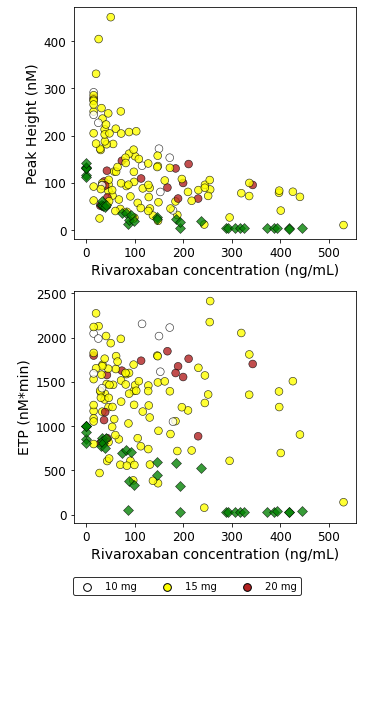

In [21]:
fig11, ax11 = plt.subplots(ncols = 1, nrows = 2, figsize = (5, 8))
fig11.patch.set_facecolor('white')



sns.scatterplot(x = 'conc', y = 'ph_ts', data = pkpd[pkpd['doac'] == 'R'], ax = ax11[0], hue = 'dosing', s = 60, alpha = 0.8, palette = {10 : 'white', 15: 'yellow', 20:'firebrick'}, edgecolor = 'black')
sns.scatterplot(x = 'conc', y = 'ph_ts', data = pkpd[pkpd['doac'] == 'VR'], ax =ax11[0], s = 50, marker = 'D', color = "green", edgecolor = 'black', alpha = .78)
ax11[0].set_ylabel('Peak Height (nM)', size = 14)
ax11[0].set_xlabel('Rivaroxaban concentration (ng/mL)', size = 14)
ax11[0].tick_params(axis='x', labelsize=12)
ax11[0].tick_params(axis = 'y', labelsize = 12)


sns.scatterplot(x = 'conc', y = 'etp_ts', data = pkpd[pkpd['doac'] == 'R'], ax = ax11[1], hue = 'dosing', s = 60, alpha = 0.8, palette = {10 : 'white', 15: 'yellow', 20:'firebrick'}, edgecolor = 'black')
sns.scatterplot(x = 'conc', y = 'etp_ts', data = pkpd[pkpd['doac'] == 'VR'], ax =ax11[1], s = 50, marker = 'D', color = "green", edgecolor = 'black', alpha = .78)
ax11[1].set_ylabel('ETP (nM*min)', size = 14)
ax11[1].set_xlabel('Rivaroxaban concentration (ng/mL)', size = 14)
ax11[1].tick_params(axis='x', labelsize=12)
ax11[1].tick_params(axis = 'y', labelsize = 12)
ax11[1].legend().remove()


legend_fig11 = ax11[0].legend()
handles, labels = ax11[0].get_legend_handles_labels()

for ha in handles:
    ha.set_edgecolor("black")
    ha.set_sizes([60])
legend_fig11.remove()
legend_fig11_ax = fig11.add_axes([0, -0.25, 1, 0.05])
legend_fig11_ax.legend(handles=handles, labels = ['10 mg', '15 mg', '20 mg'], loc='center', ncol=len(df_temp_ds['doac'].unique()),
                 bbox_to_anchor=(0.5, 4.5), edgecolor = 'black')
legend_fig11_ax.axis('off')   

plt.tight_layout()
plt.savefig('clubiia_riva')    
plt.show()

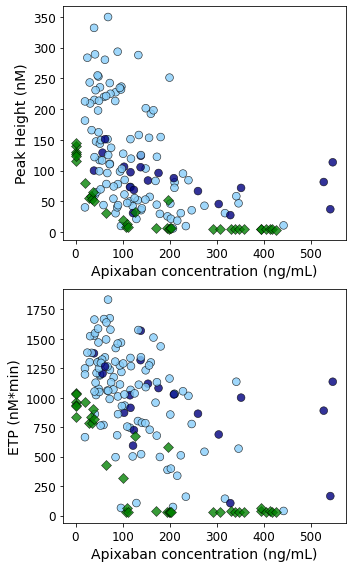

In [22]:
fig12, ax12 = plt.subplots(ncols = 1, nrows = 2, figsize = (5, 8))
fig12.patch.set_facecolor('white')



sns.scatterplot(x = 'conc', y = 'ph_ts', data = pkpd[pkpd['doac'] == 'A'], ax = ax12[0], hue = 'dosing', s = 60, alpha = 0.8, palette = palette_apix, edgecolor = 'black')
sns.scatterplot(x = 'conc', y = 'ph_ts', data = pkpd[pkpd['doac'] == 'VA'], ax =ax12[0], s = 50, marker = 'D', color = "green", edgecolor = 'black', alpha = .78)
ax12[0].set_ylabel('Peak Height (nM)', size = 14)
ax12[0].set_xlabel('Apixaban concentration (ng/mL)', size = 14)
ax12[0].tick_params(axis='x', labelsize=12)
ax12[0].tick_params(axis = 'y', labelsize = 12)


sns.scatterplot(x = 'conc', y = 'etp_ts', data = pkpd[pkpd['doac'] == 'A'], ax = ax12[1], hue = 'dosing', s = 60, alpha = 0.8, palette = palette_apix, edgecolor = 'black')
sns.scatterplot(x = 'conc', y = 'etp_ts', data = pkpd[pkpd['doac'] == 'VA'], ax =ax12[1], s = 50, marker = 'D', color = "green", edgecolor = 'black', alpha = .78)
ax12[1].set_ylabel('ETP (nM*min)', size = 14)
ax12[1].set_xlabel('Apixaban concentration (ng/mL)', size = 14)
ax12[1].tick_params(axis='x', labelsize=12)
ax12[1].tick_params(axis = 'y', labelsize = 12)
ax12[1].legend().remove()


legend_fig12 = ax12[0].legend()
handles, labels = ax12[0].get_legend_handles_labels()

for ha in handles:
    ha.set_edgecolor("black")
    ha.set_sizes([60])
legend_fig12.remove()
legend_fig12_ax = fig11.add_axes([0, -0.25, 1, 0.05])
legend_fig12_ax.legend(handles=handles, labels = ['2.5 mg b.i.d.', '5 mg b.i.d.'], loc='center', ncol=len(df_temp_ds['doac'].unique()),
                 bbox_to_anchor=(0.5, 4.5), edgecolor = 'black')
legend_fig12_ax.axis('off')   

plt.tight_layout()
plt.savefig('clubiia_apix')    
plt.show()

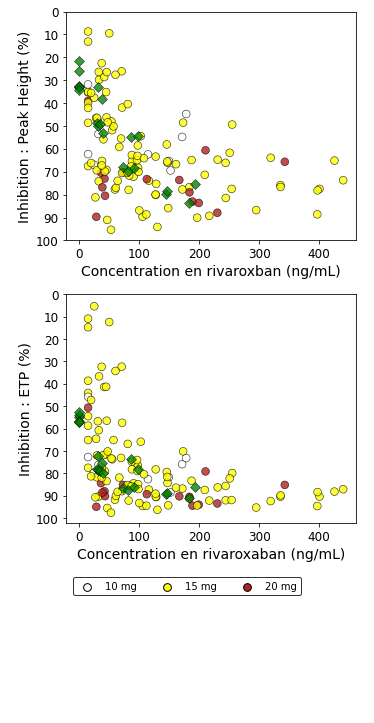

In [23]:
fig13, ax13 = plt.subplots(ncols = 1, nrows = 2, figsize = (5, 8))
fig13.patch.set_facecolor('white')


sns.scatterplot(x = 'conc', y = 'ph_inhib', data = pkpd[pkpd['doac'] == 'R'], ax = ax13[0], hue = 'dosing', s = 60, alpha = 0.8, palette = {10 : 'white', 15: 'yellow', 20:'firebrick'}, edgecolor = 'black')
sns.scatterplot(x = 'conc', y = 'ph_inhib', data = pkpd[(pkpd['doac'] == 'VR') & (pkpd['ph_inhib'] > 20)], ax =ax13[0], s = 50, marker = 'D', color = "green", edgecolor = 'black', alpha = .78)

ax13[0].set_ylabel('Inhibition : Peak Height (%)', size = 14)
ax13[0].set_xlabel('Concentration en rivaroxban (ng/mL)', size = 14)
ax13[0].set_yticks(range(0,101,10))
ax13[0].tick_params(axis='x', labelsize=12)
ax13[0].tick_params(axis = 'y', labelsize = 12)
ax13[0].invert_yaxis()


sns.scatterplot(x = 'conc', y = 'etp_inhib', data = pkpd[pkpd['doac'] == 'R'], ax = ax13[1], hue = 'dosing', s = 60, alpha = 0.8, palette = {10 : 'white', 15: 'yellow', 20:'firebrick'}, edgecolor = 'black')
sns.scatterplot(x = 'conc', y = 'etp_inhib', data = pkpd[pkpd['doac'] == 'VR'], ax =ax13[1], s = 50, marker = 'D', color = "green", edgecolor = 'black', alpha = .78)
ax13[1].set_ylabel('Inhibition : ETP (%)', size = 14)
ax13[1].set_xlabel('Concentration en rivaroxaban (ng/mL)', size = 14)
ax13[1].set_yticks(range(0,101,10))
ax13[1].tick_params(axis='x', labelsize=12)
ax13[1].tick_params(axis = 'y', labelsize = 12)
ax13[1].invert_yaxis()
ax13[1].legend().remove()


legend_fig13 = ax13[0].legend()
handles, labels = ax13[0].get_legend_handles_labels()

for ha in handles:
    ha.set_edgecolor("black")
    ha.set_sizes([60])
legend_fig13.remove()
legend_fig13_ax = fig13.add_axes([0, -0.25, 1, 0.05])
legend_fig13_ax.legend(handles=handles, labels = ['10 mg', '15 mg', '20 mg'], loc='center', ncol=len(df_temp_ds['doac'].unique()),
                 bbox_to_anchor=(0.5, 4.5), edgecolor = 'black')
legend_fig13_ax.axis('off')   





plt.tight_layout()
plt.savefig('clubiia_riva_inhib')    
plt.show()

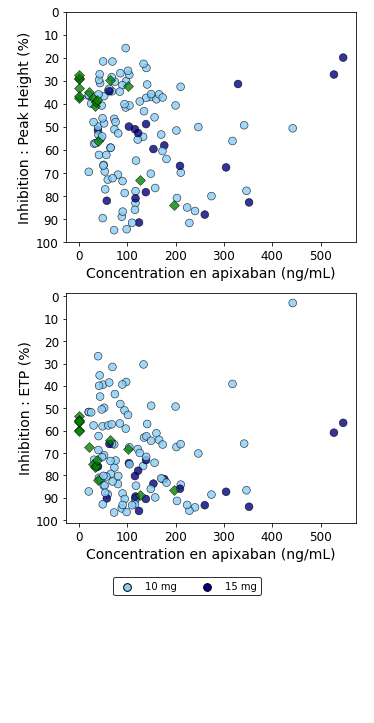

In [24]:
fig14, ax14 = plt.subplots(ncols = 1, nrows = 2, figsize = (5, 8))
fig14.patch.set_facecolor('white')


sns.scatterplot(x = 'conc', y = 'ph_inhib', data = pkpd[pkpd['doac'] == 'A'], ax = ax14[0], hue = 'dosing', s = 60, alpha = 0.8, palette = palette_apix, edgecolor = 'black')
sns.scatterplot(x = 'conc', y = 'ph_inhib', data = pkpd[(pkpd['doac'] == 'VA') & (pkpd['conc'] < 250)], ax =ax14[0], s = 50, marker = 'D', color = "green", edgecolor = 'black', alpha = .78)

ax14[0].set_ylabel('Inhibition : Peak Height (%)', size = 14)
ax14[0].set_xlabel('Concentration en apixaban (ng/mL)', size = 14)
ax14[0].set_yticks(range(0,101,10))
ax14[0].tick_params(axis='x', labelsize=12)
ax14[0].tick_params(axis = 'y', labelsize = 12)
ax14[0].invert_yaxis()


sns.scatterplot(x = 'conc', y = 'etp_inhib', data = pkpd[pkpd['doac'] == 'A'], ax = ax14[1], hue = 'dosing', s = 60, alpha = 0.8, palette = palette_apix, edgecolor = 'black')
sns.scatterplot(x = 'conc', y = 'etp_inhib', data = pkpd[(pkpd['doac'] == 'VA') & (pkpd['conc'] < 250)], ax =ax14[1], s = 50, marker = 'D', color = "green", edgecolor = 'black', alpha = .78)
ax14[1].set_ylabel('Inhibition : ETP (%)', size = 14)
ax14[1].set_xlabel('Concentration en apixaban (ng/mL)', size = 14)
ax14[1].set_yticks(range(0,101,10))
ax14[1].tick_params(axis='x', labelsize=12)
ax14[1].tick_params(axis = 'y', labelsize = 12)
ax14[1].invert_yaxis()
ax14[1].legend().remove()


legend_fig14 = ax14[0].legend()
handles, labels = ax14[0].get_legend_handles_labels()

for ha in handles:
    ha.set_edgecolor("black")
    ha.set_sizes([60])
legend_fig14.remove()
legend_fig14_ax = fig14.add_axes([0, -0.25, 1, 0.05])
legend_fig14_ax.legend(handles=handles, labels = ['10 mg', '15 mg', '20 mg'], loc='center', ncol=len(df_temp_ds['doac'].unique()),
                 bbox_to_anchor=(0.5, 4.5), edgecolor = 'black')
legend_fig14_ax.axis('off')   





plt.tight_layout()
plt.savefig('clubiia_apix_inhib')    
plt.show()